# <span style="color:purple"> Final Project The Economist Semantic Analysis (3)

In [1]:
import lucem_illud 

import pandas #gives us DataFrames
import numpy as np #For divergences/distances
import scipy #For divergences/ distances/ hierarchical clustering and some visuals

import nltk #the Natural Language Toolkit
from nltk.corpus import stopwords #For stopwords

import seaborn as sns #makes our plots look nicer
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import wordcloud #Makes word clouds

#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.manifold #For a manifold plot

import gensim#For topic modeling

from bs4 import BeautifulSoup
import requests #for http requests
from requests import get
import urllib.parse #For joining urls
import re #for regexs
import json #For API responses

import itertools

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [310]:
SectorDF = lucem_illud.loadTextDirectory('/Users/Techbar/Downloads/Calculate_cos_Sector/Sec_1')

In [311]:
len(SectorDF)

60

In [312]:
# Tokenize and normalize the texts
SectorDF['tokenized_sents'] = SectorDF['text'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
SectorDF['normalized_sents'] = SectorDF['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

SectorDF[:5]

,text,tokenized_sents,normalized_sents
Business_2006_01.txt,\n\t\t\tBig Mac index\n\t\t\tThe Economist's B...,"[[Big, Mac, index, The, Economist, 's, Big, Ma...","[[big, mac, index, economist, big, mac, index,..."
Business_2006_02.txt,\n\t\t\tTenders Proprietatea Fund - Board of a...,"[[Tenders, Proprietatea, Fund, -, Board, of, a...","[[tenders, proprietatea, fund, board, administ..."
Business_2006_03.txt,\n\t\t\t3 Appointments Ml European i Investmen...,"[[3, Appointments, Ml, European, i, Investment...","[[appointments, ml, european, investment, bank..."
Business_2006_04.txt,\n\t\t\tBusiness\n\t\t\tMicrosoft Spot the din...,"[[Business, Microsoft, Spot, the, dinosaur, (,...","[[business, microsoft, spot, dinosaur, jtf, re..."
Business_2006_05.txt,\n\t\t\tThe EU and Gazprom Divided and panicky...,"[[The, EU, and, Gazprom, Divided, and, panicky...","[[eu, gazprom, divided, panicky, paris, europe..."


In [313]:
# word to vector
SectorW2V = gensim.models.word2vec.Word2Vec(SectorDF['normalized_sents'].sum())


In [314]:
# words and their frequencies -- generate the list of representative words
SectorDF['tokenized_text'] = SectorDF['text'].apply(lambda x: nltk.word_tokenize(x))
countsDict = {}
for word in SectorDF['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)

In [315]:
#word_counts[60:150]
#keywords = ['America']
#for i in range(60, 5060):
#    keywords.append(word_counts[i][0])
#keywords = ['crunch','bubbles','wreckage', 'collapse','negative','bubble',
#           'worst','crises','meltdowns','turmoil','loss','loan', 'panic', 'global']

In [322]:
#word_counts[60:150]
#keywords = ['America']
#for i in range(60, 5060):
#    keywords.append(word_counts[i][0])
keywords = ['crunch','bubbles','wreckage', 'collapse','negative','bubble',
           'worst','crises','turmoil','loss','loan', 'panic', 'global']

In [323]:
# I will only target the top 200 words in the list
numWords = 200
targetWords = SectorW2V.wv.index2word[:numWords]


stop_words_nltk = stopwords.words('english')

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

SectorDF['normalized_tokens'] = SectorDF['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = None))

SectorDF['normalized_tokens_count'] = SectorDF['normalized_tokens'].apply(lambda x: len(x))

SectorDF.sort_values(by='normalized_tokens_count', ascending=False)[:3]

,text,tokenized_sents,normalized_sents,tokenized_text,normalized_tokens,normalized_tokens_count,text_name,Tagged_Text
Business_2007_06.txt,\n\t\t\tContents\n\t\t\tOn the cover How busin...,"[[Contents, On, the, cover, How, business, is,...","[[contents, cover, business, starting, tackle,...","[Contents, On, the, cover, How, business, is, ...","[contents, cover, business, starting, tackle, ...",33289,Business_2007_06.txt,"([contents, cover, business, starting, tackle,..."
Business_2009_02.txt,\n\t\t\tUp and away\n\t\t\tJapan's currency\n\...,"[[Up, and, away, Japan, 's, currency, Suddenly...","[[away, japan, currency, suddenly, talk, back,...","[Up, and, away, Japan, 's, currency, Suddenly,...","[away, japan, currency, suddenly, talk, back, ...",32698,Business_2009_02.txt,"([away, japan, currency, suddenly, talk, back,..."
Business_2009_01.txt,\n\t\t\tAn Icelandic success\n\t\t\tA model wa...,"[[An, Icelandic, success, A, model, way, to, c...","[[icelandic, success, model, way, catch, keep,...","[An, Icelandic, success, A, model, way, to, ca...","[icelandic, success, model, way, catch, keep, ...",31191,Business_2009_01.txt,"([icelandic, success, model, way, catch, keep,..."


In [324]:
SectorDF['text_name'] = SectorDF.index
    
taggedDocs = []
for index, row in SectorDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_tokens']]
    docKeywords.append(row['text_name']) #This lets us extract individual documnets since text_names's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'], tags = docKeywords))
SectorDF['Tagged_Text'] = taggedDocs


In [325]:
# Train a Doc2Vec model
SectorD2V = gensim.models.doc2vec.Doc2Vec(SectorDF['Tagged_Text'], size = 300) #Limiting to 100 dimensions

In [326]:
targetDocs = SectorDF['text_name']

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = SectorD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, SectorD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

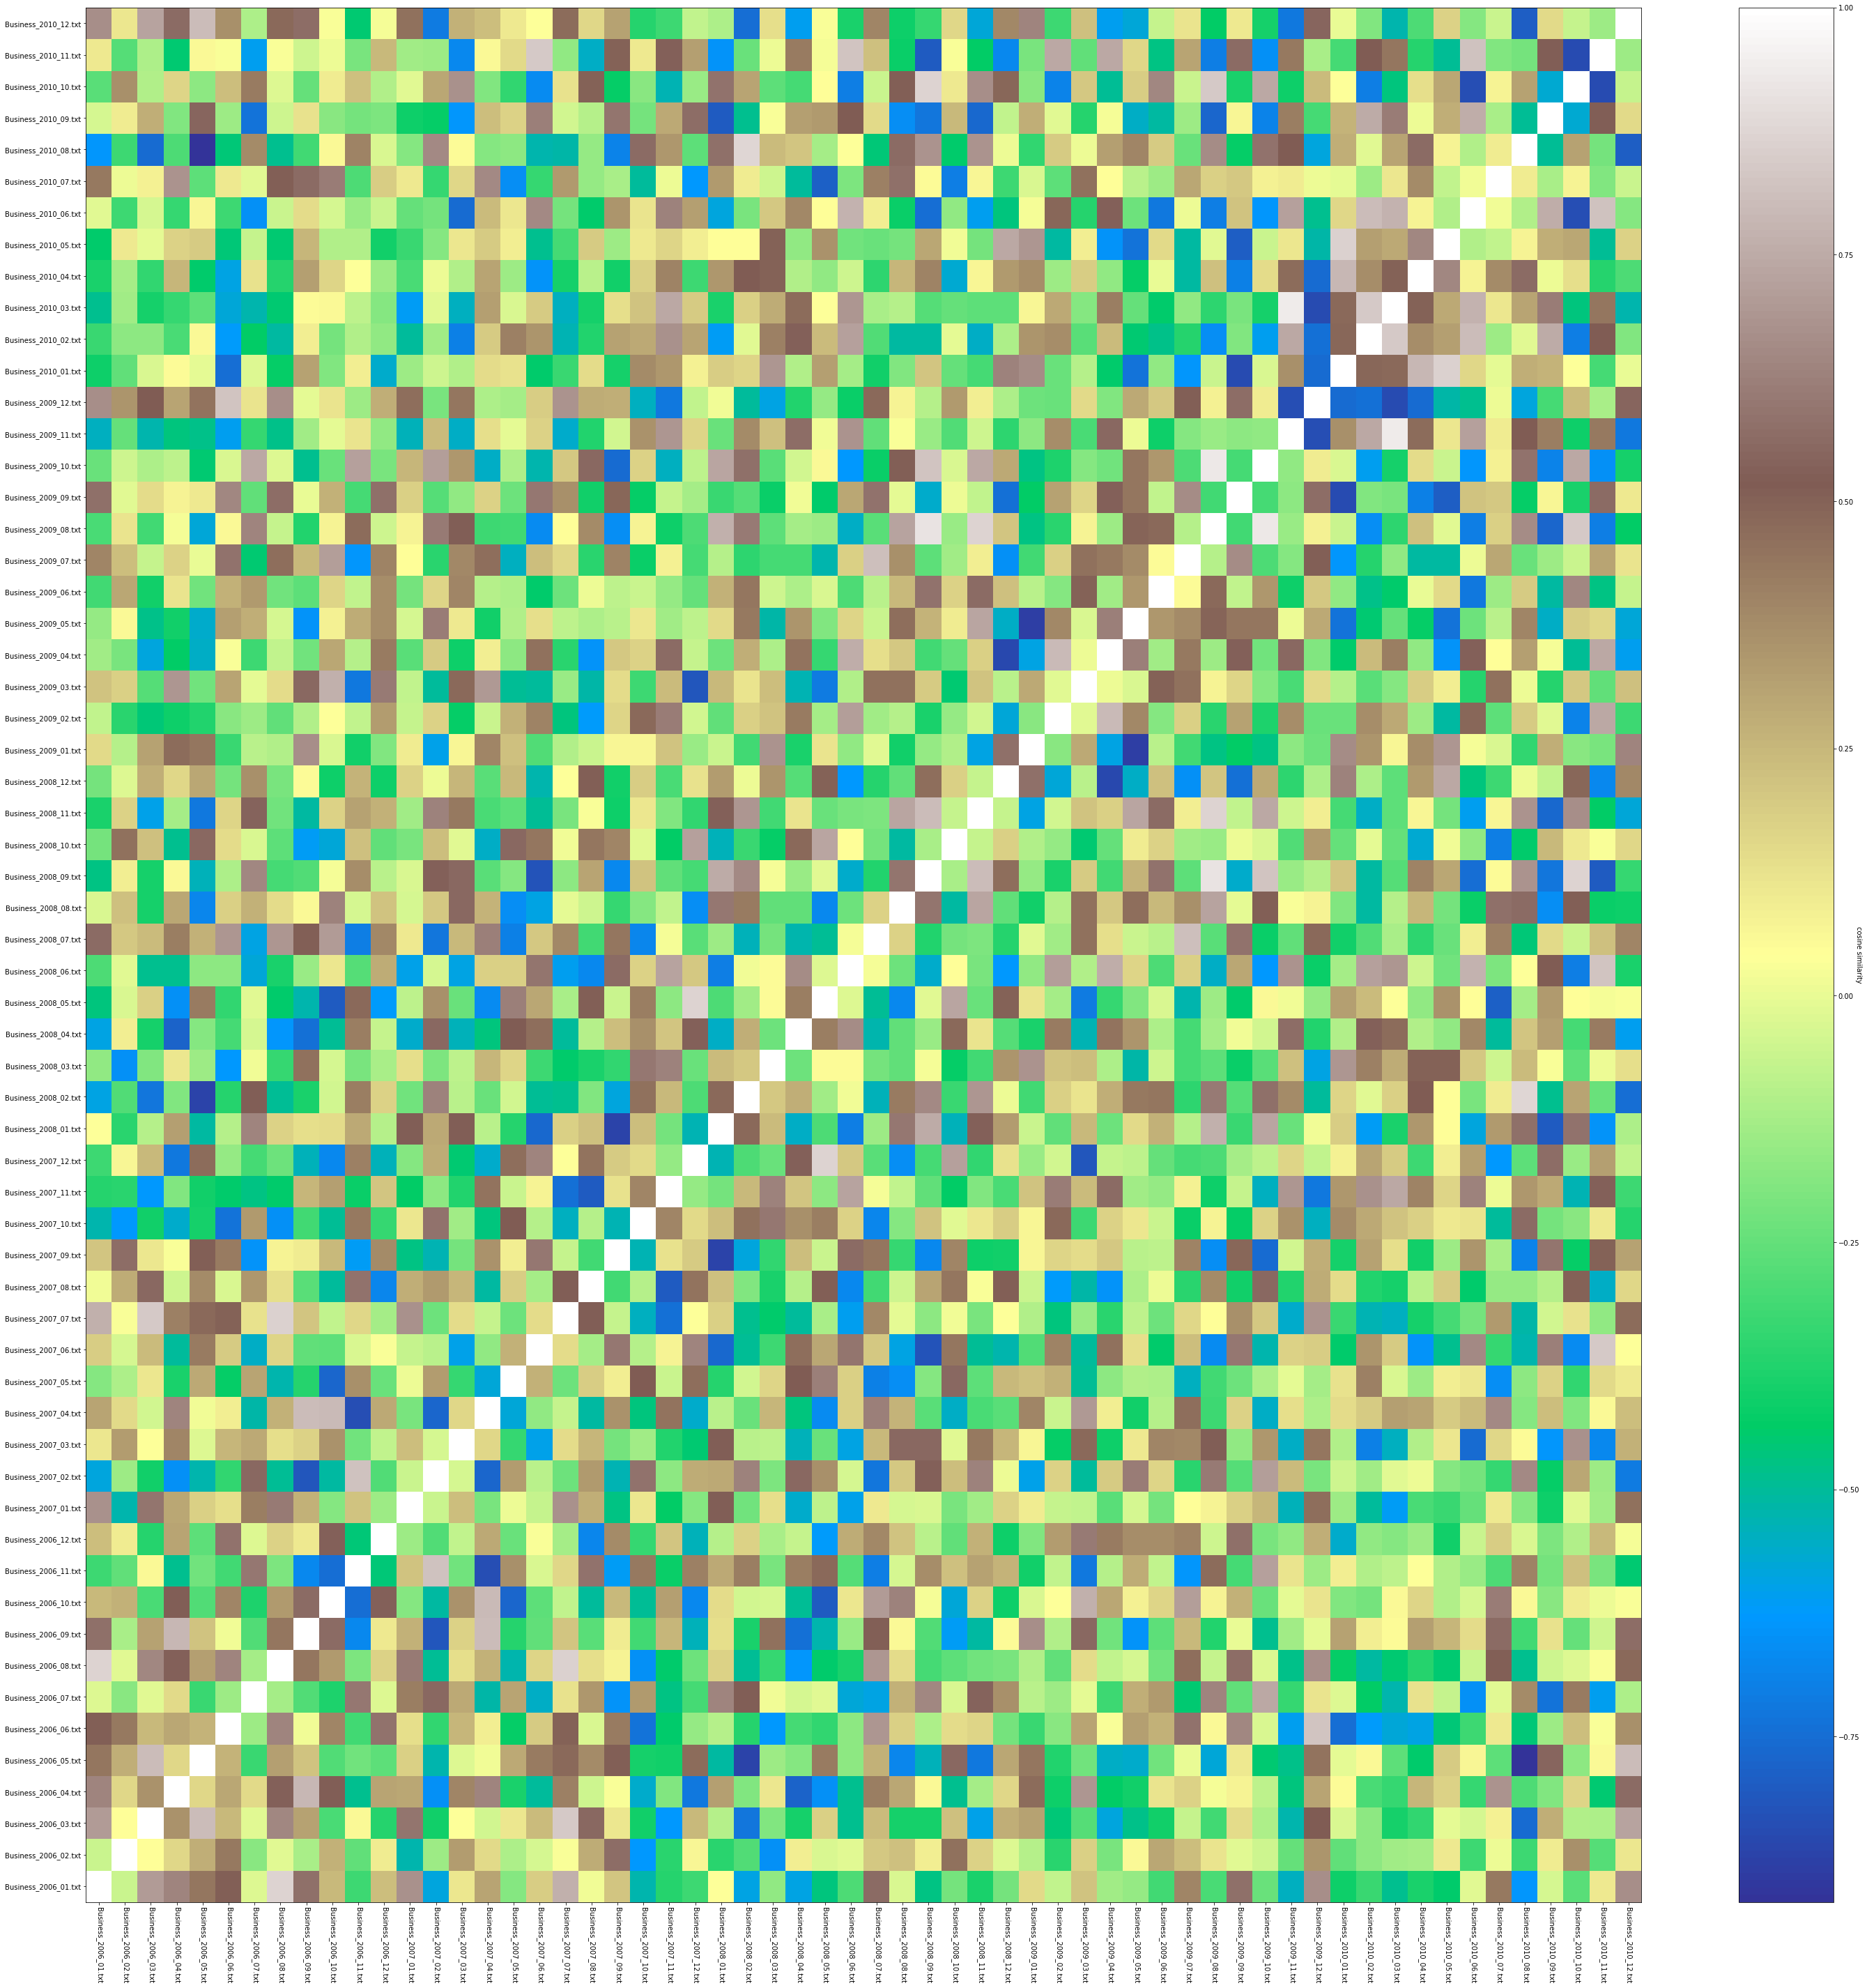

In [327]:
fig, ax = plt.subplots(figsize=(50,50))
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)
fig.savefig('Sector_cos_by_month.jpg',bbox_inches='tight')

In [304]:
# find out the text file most similar to a list of words
SectorD2V.docvecs.most_similar([ SectorD2V['crunch']+SectorD2V['loan']+
                                  SectorD2V['collapse']+
                                  SectorD2V['turmoil']+SectorD2V['bubbles']+
                                SectorD2V['negative']+SectorD2V['worst']+SectorD2V['turmoil']+
                                +SectorD2V['loss']+SectorD2V['global']+
                                  SectorD2V['crisis']+SectorD2V['panic']], topn=60 )


[('Science and technology_2006_09.txt', 0.9984021186828613),
 ('Science and technology_2006_10.txt', 0.9973214864730835),
 ('Science and technology_2008_06.txt', 0.9972294569015503),
 ('Science and technology_2006_06.txt', 0.9967671632766724),
 ('Science and technology_2009_02.txt', 0.9948326349258423),
 ('Science and technology_2006_03.txt', 0.9931377172470093),
 ('Science and technology_2010_05.txt', 0.9924449920654297),
 ('Science and technology_2008_10.txt', 0.9874076247215271),
 ('Science and technology_2008_01.txt', 0.986800491809845),
 ('Science and technology_2006_07.txt', 0.9844086170196533),
 ('global', 0.9819625616073608),
 ('Science and technology_2007_03.txt', 0.9780654907226562),
 ('Science and technology_2007_05.txt', 0.9771063923835754),
 ('Science and technology_2006_05.txt', 0.9686373472213745),
 ('panic', 0.9568260908126831),
 ('Science and technology_2006_04.txt', 0.9386487007141113),
 ('Science and technology_2006_08.txt', 0.9374112486839294),
 ('turmoil', 0.922586

In [305]:
# find out the text file most similar to a list of words
SectorD2V.docvecs.most_similar([ SectorD2V['crunch']+SectorD2V['loan']+
                                  SectorD2V['collapse']+SectorD2V['wreckage']+
                                  SectorD2V['turmoil']+SectorD2V['bubbles']+SectorD2V['wreckage']+
                                SectorD2V['negative']+SectorD2V['worst']+SectorD2V['turmoil']+
                                +SectorD2V['loss']+SectorD2V['global']+
                                  SectorD2V['crisis']+SectorD2V['panic']], topn=60 )


KeyError: "word 'wreckage' not in vocabulary"

## <span style="color:purple"> Calculate the cosine Similarity

In [328]:
Cosine_similarity_1 = []
Cosine_similarity_2 = []
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = SectorD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, SectorD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    Cosine_similarity_1.append(column)
    Cosine_similarity_2.extend(column)    
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)
    

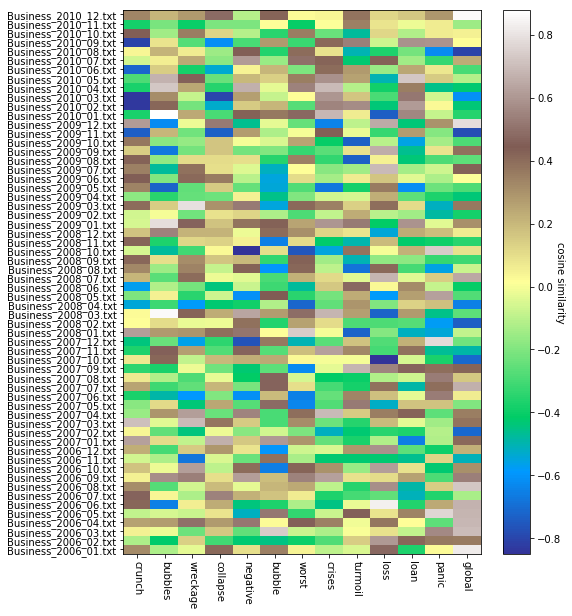

In [329]:
fig, ax = plt.subplots(figsize=(8,10))
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [330]:
fig.savefig('Sector_Business_cos_doc_keyword.jpg',bbox_inches='tight')

In [331]:
Cosine_similarity_1

[[0.3220031,
  -0.12601227,
  -0.030872013,
  0.41135412,
  0.09807662,
  0.3518749,
  0.046694525,
  -0.096631505,
  -0.049202774,
  0.47937423,
  -0.36892352,
  0.026078198,
  0.82259864],
 [-0.12290127,
  -0.4186596,
  0.14273821,
  -0.30254045,
  -0.42806122,
  -0.44853726,
  -0.39034688,
  -0.27934948,
  0.14783737,
  0.60833055,
  0.41945976,
  0.36983016,
  0.36037567],
 [0.05519671,
  -0.017782655,
  -0.22876789,
  0.16189843,
  -0.25074616,
  0.7385995,
  -0.07567924,
  -0.12002996,
  0.003256557,
  0.094411954,
  -0.08812455,
  0.5663545,
  0.6984911],
 [0.2639094,
  0.27315232,
  0.49684355,
  0.28343406,
  0.5205325,
  0.024953324,
  0.45392582,
  0.34586817,
  -0.01053595,
  0.3759842,
  0.018817823,
  -0.2595398,
  0.6888135],
 [-0.09001845,
  -0.05288211,
  -0.07663995,
  0.08902187,
  -0.51518524,
  0.52007157,
  -0.33453026,
  -0.075863294,
  0.45668656,
  0.08585079,
  0.34103867,
  0.7675974,
  0.6798634],
 [0.41775468,
  -0.6467661,
  0.056306362,
  0.23279683,
  -0